In [1]:
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt
import cv2

In [2]:
def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex

In [19]:
def plot_image_info(path,k=2):
    #load limage
    img_bgr=cv2.imread(path)
    img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
    
    # resize image to speed up processing time
    resized_img_rgb = cv2.resize(img_rgb, (64, 64), interpolation=cv2.INTER_AREA)
    # reshape the image to be a list of pixels
    img_list = resized_img_rgb.reshape((resized_img_rgb.shape[0] * resized_img_rgb.shape[1], 3))
    
     # cluster the pixels and assign labels
    clt = KMeans(n_clusters=k)
    labels = clt.fit_predict(img_list)
        
    # count labels to find most popular
    label_counts = Counter(labels)
    total_count = sum(label_counts.values())

    # subset out most popular centroid
    center_colors = list(clt.cluster_centers_)
    ordered_colors = [center_colors[i]/255 for i in label_counts.keys()]
    color_labels = [rgb2hex(ordered_colors[i]*255) for i in label_counts.keys()]
    
    print(label_counts.values())
    print(color_labels)
    
    print(label_counts.most_common)
    
     # plots
    plt.figure(figsize=(14, 8))
    plt.subplot(221)
    plt.imshow(img_rgb)
    plt.axis('off')
    
    plt.subplot(222)
    plt.pie(label_counts.values(), labels=color_labels, colors=ordered_colors, startangle=90)
    plt.axis('equal')
    plt.show()

In [21]:
plot_image_info("olaf.jpg")

dict_values([853, 683, 998, 419, 1143])
['#c9f0fd', '#a1dff8', '#6caad3', '#76d1f7', '#5281a9']


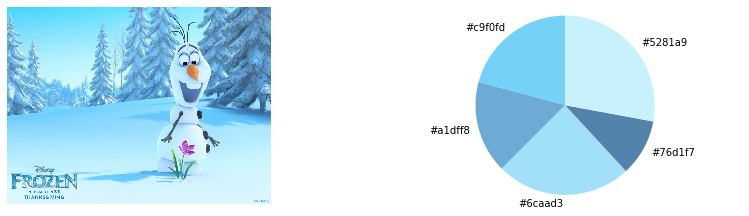

In [33]:
plot_image_info("olaf.jpg")